<a href="https://colab.research.google.com/github/sandhya14-automation/Image_Classification_Using_CNN_on_CIFAR-10/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification Using CNN on CIFAR‑10**

In [1]:
# ============================================================
# 1. Environment Setup
# ============================================================

!pip install -q tensorflow matplotlib scikit-learn gradio

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import gradio as gr

np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
# ============================================================
# 2. Load CIFAR-10 Dataset
# ============================================================

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


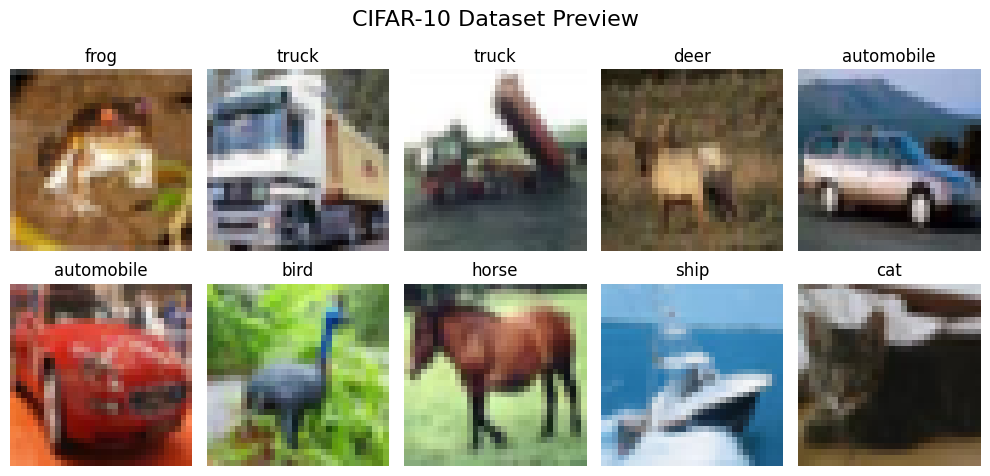

In [3]:
# ============================================================
# 3. Dataset Preview
# ============================================================

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")

plt.suptitle("CIFAR-10 Dataset Preview", fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# ============================================================
# 4. Hyperparameters
# ============================================================

IMG_SIZE = (32, 32)
BATCH_SIZE = 64
EPOCHS = 10
NUM_CLASSES = 10

In [5]:
# ============================================================
# 5. Data Generators (Augmentation)
# ============================================================

train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = train_gen.flow(
    X_train, tf.keras.utils.to_categorical(y_train, NUM_CLASSES),
    batch_size=BATCH_SIZE
)

test_data = ImageDataGenerator().flow(
    X_test, tf.keras.utils.to_categorical(y_test, NUM_CLASSES),
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [6]:
# ============================================================
# 6. Build CNN Model (Improved)
# ============================================================

def build_fast_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_fast_cnn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,970 (4.26 MB)

 Trainable params: 1,116,970 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ============================================================
# 7. Compile Model
# ============================================================

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# ============================================================
# 8. Train Model
# ============================================================

# Create smaller dataset
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

# Use small dataset in generator
train_data = train_gen.flow(
    X_train_small,
    tf.keras.utils.to_categorical(y_train_small, NUM_CLASSES),
    batch_size=BATCH_SIZE
)

# Train the model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.1898 - loss: 2.1573 - val_accuracy: 0.3657 - val_loss: 1.7447
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.3365 - loss: 1.7865 - val_accuracy: 0.4493 - val_loss: 1.5031
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4000 - loss: 1.6386 - val_accuracy: 0.4810 - val_loss: 1.4154
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.4402 - loss: 1.5296 - val_accuracy: 0.4810 - val_loss: 1.4358
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4772 - loss: 1.4417 - val_accuracy: 0.5229 - val_loss: 1.3023
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.4885 - loss: 1.3966 - val_accuracy: 0.5648 - val_loss: 1.2049
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5178 - loss: 1.3264 - val_accuracy: 0.5719 - val_loss: 1.2026
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.5463 - loss: 1.2787 - val_accuracy: 0.55

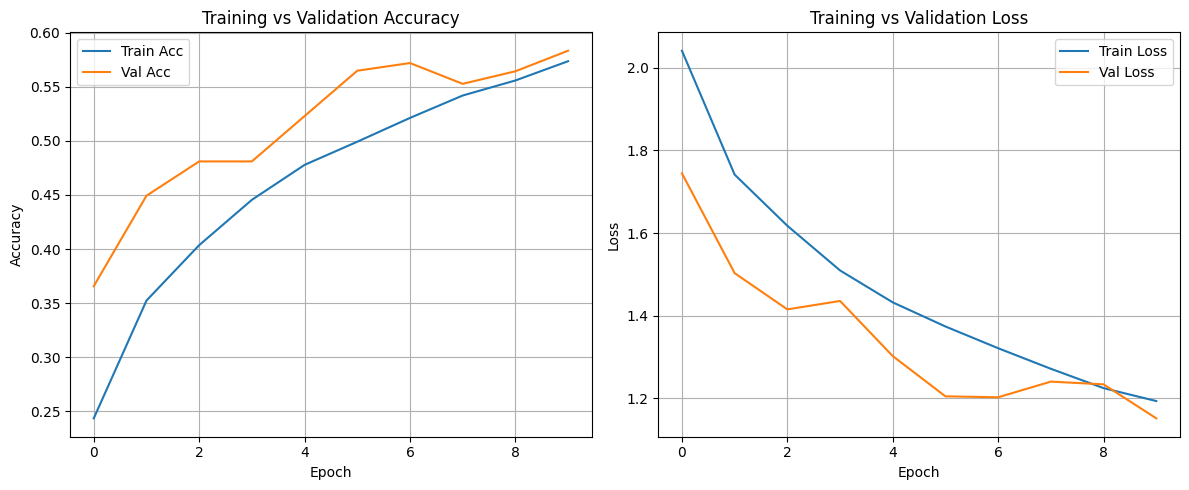

In [9]:
# ============================================================
# 9. Plot Accuracy & Loss
# ============================================================

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# ============================================================
# 10. Evaluation
# ============================================================

y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.79      0.47      0.59      1000
  automobile       0.58      0.92      0.71      1000
        bird       0.55      0.32      0.40      1000
         cat       0.48      0.25      0.33      1000
        deer       0.52      0.48      0.50      1000
         dog       0.57      0.42      0.48      1000
        frog       0.46      0.87      0.60      1000
       horse       0.65      0.72      0.68      1000
        ship       0.75      0.70      0.73      1000
       truck       0.60      0.69      0.64      1000

    accuracy                           0.58     10000
   macro avg       0.60      0.58      0.57     10000
weighted avg       0.60      0.58      0.57     10000


Confusion Matrix:
[[471 118  86  12  36   7  28  25 130  87]
 [  2 920   0   1   0   0   8   3   5  61]
 [ 40  26 315  38 177  81 214  47  27  35]
 [  9  36  48 248  68 152 30

In [11]:
# ============================================================
# 11. Save Model
# ============================================================

model.save("cifar10_cnn_model.h5")
print("Model saved as cifar10_cnn_model.h5")

Model saved as cifar10_cnn_model.h5


In [12]:
# ============================================================
# 12. Optional: Gradio App
# ============================================================

def predict_image(img):
    img = img.resize((32, 32))
    img = np.array(img).astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)[0]
    return {class_names[i]: float(preds[i]) for i in range(10)}

demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=5),
    title="CIFAR-10 Image Classifier",
    description="Upload an image (32x32) to classify."
)

# Uncomment to run in Colab:
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://36310c4d276e681de2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
